## Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    return pd.read_csv(path_to_csv), None


def read_hr_dataset(path_to_csv):
    X = pd.read_csv(path_to_csv)
    y = X.target
    X = X.drop(columns=['target'])
    return X, y

In [3]:
COVID_DATA_PATH = "hw1_data/covid.csv"
HR_DATA_PATH = "hw1_data/hr.csv"

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

In [5]:
X_covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [6]:
X_hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [7]:
X_hr.describe()

,enrollee_id,city_development_index,training_hours
count,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896
std,9616.292592,0.123362,60.058462
min,1.000000,0.448000,1.000000
25%,8554.250000,0.740000,23.000000
50%,16982.500000,0.903000,47.000000
75%,25169.750000,0.920000,88.000000
max,33380.000000,0.949000,336.000000


In [8]:
y_hr.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201ACE784C8>,
      dtype=object)

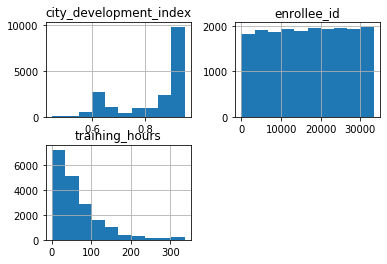

In [9]:
X_hr.hist(column=['enrollee_id', 'city_development_index', 'training_hours'])

*!!Let's say that the id feature is not interesting for us (it's numeric, but we should't analyse it)!!*

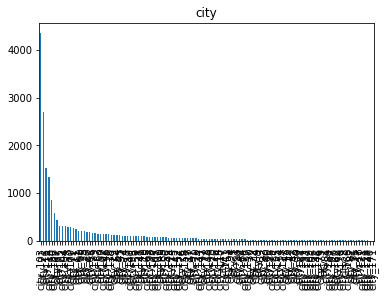

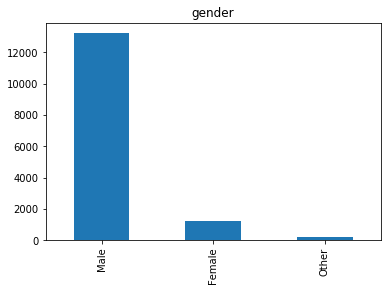

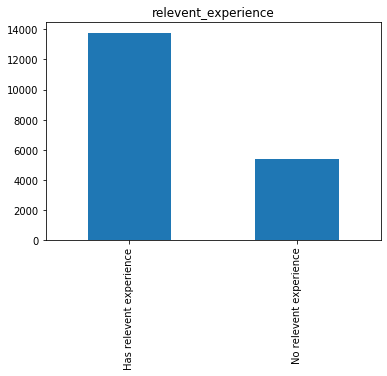

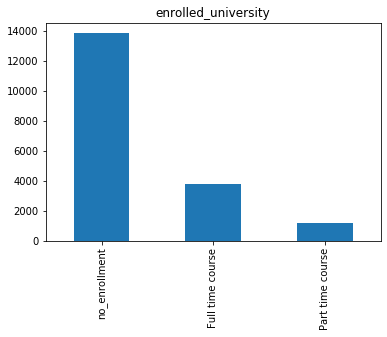

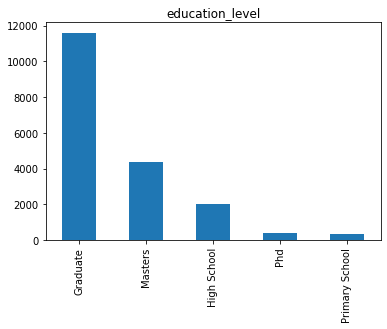

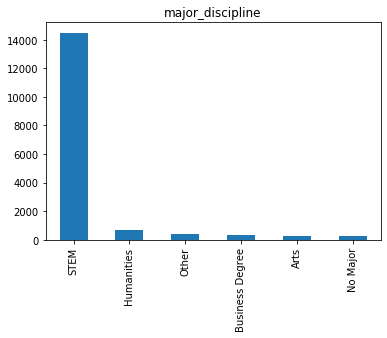

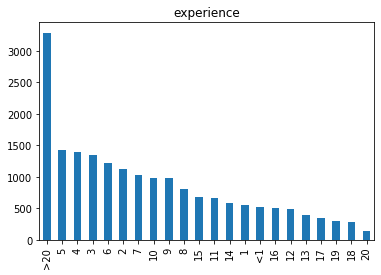

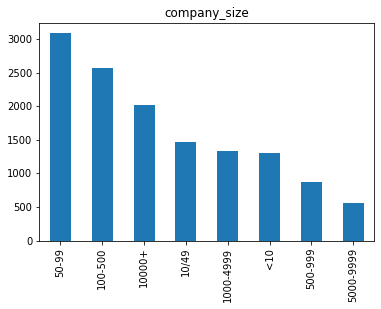

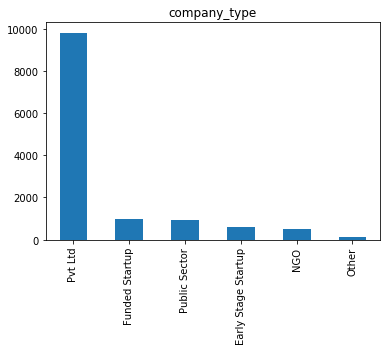

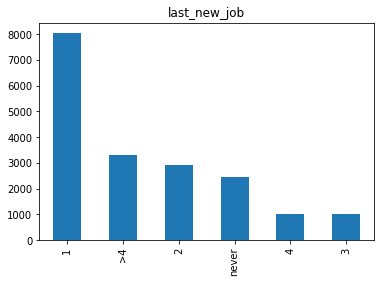

In [10]:
categorial_names = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                    'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

for column_name in categorial_names:
    X_hr[column_name].value_counts().plot(kind='bar', title=column_name)
    plt.show()


#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [11]:
print(f'Исходный размер датасета hr {len(X_hr.index)}')

Исходный размер датасета hr 19158


In [12]:
X_hr.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64

In [13]:
X_hr_dropna = X_hr.dropna()

In [14]:
print(f'Pазмер датасета covid без NaN {len(X_hr_dropna.index)}')

Pазмер датасета covid без NaN 8955


In [15]:
print(f'The dataset size is now 8955. Percent: {8955 / 19158 * 100}%')

The dataset size is now 8955. Percent: 46.74287503914813%


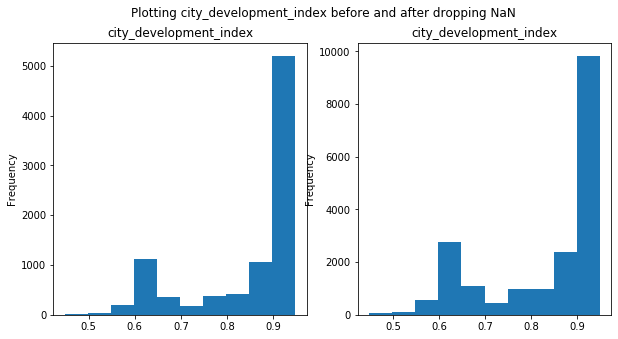

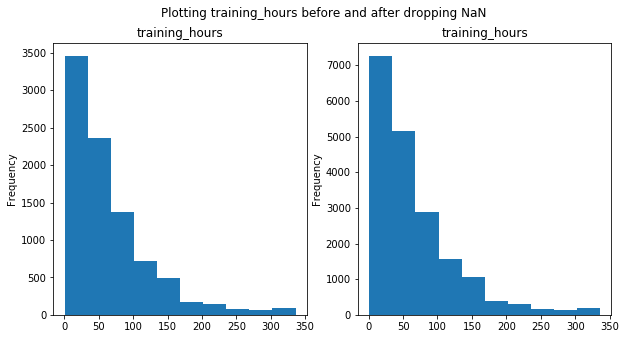

In [16]:
for column_name in ['city_development_index', 'training_hours']:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Plotting {column_name} before and after dropping NaN')
    X_hr_dropna[column_name].plot(kind='hist', title=column_name, ax=ax1, figsize=(10, 5))
    X_hr[column_name].plot(kind='hist', title=column_name, ax=ax2, figsize=(10, 5))
    plt.show()

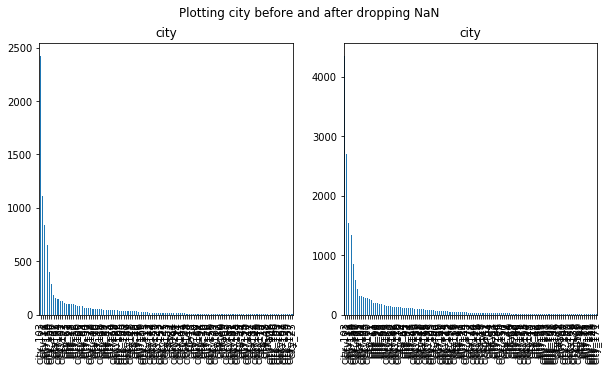

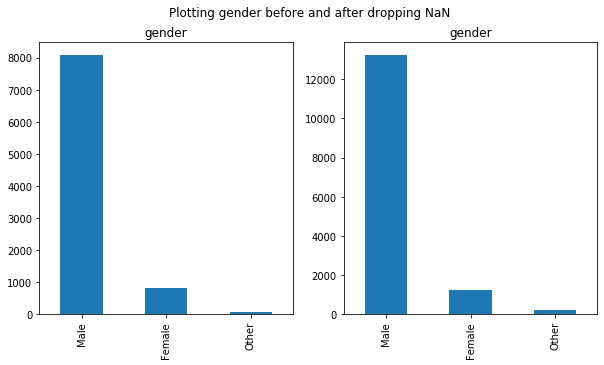

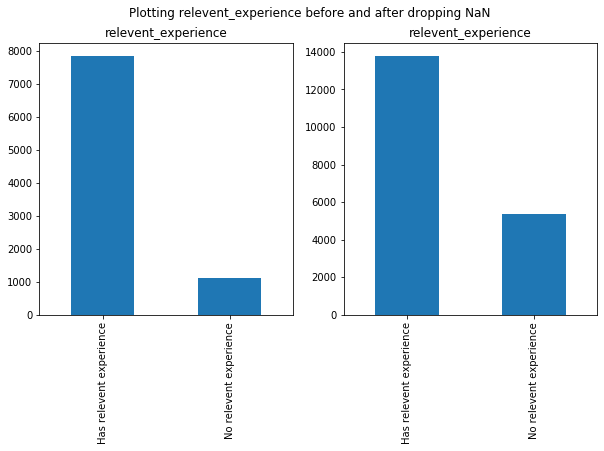

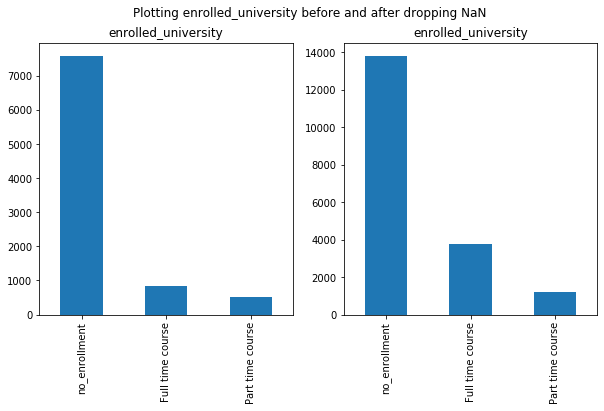

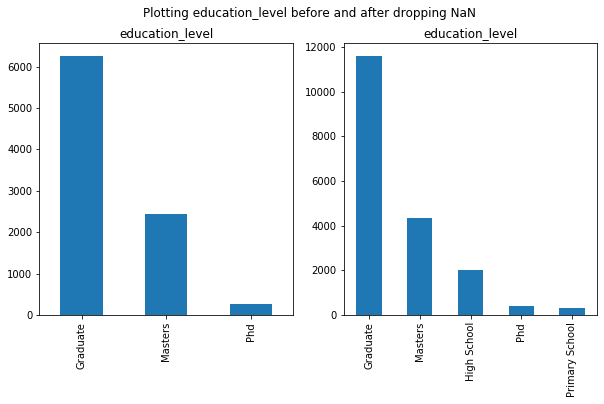

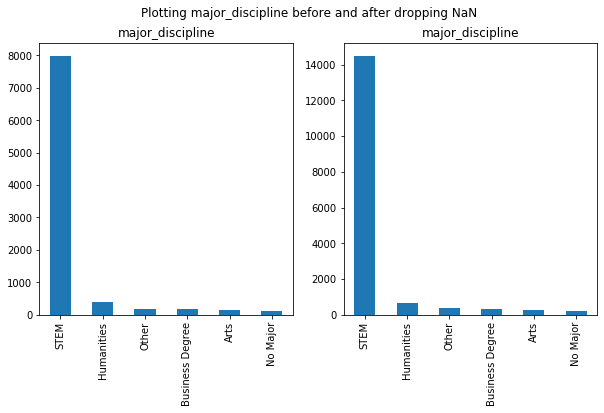

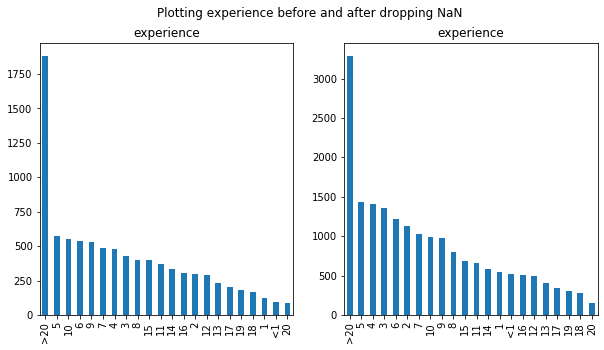

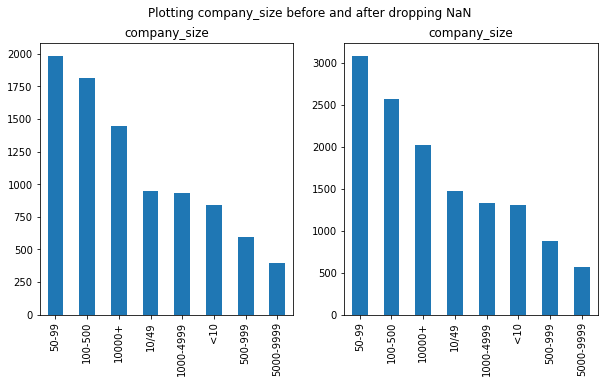

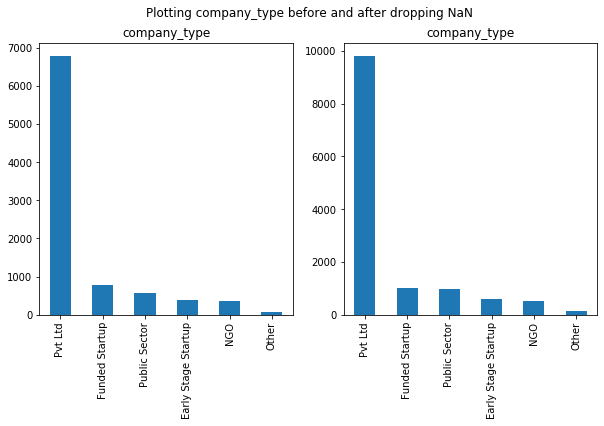

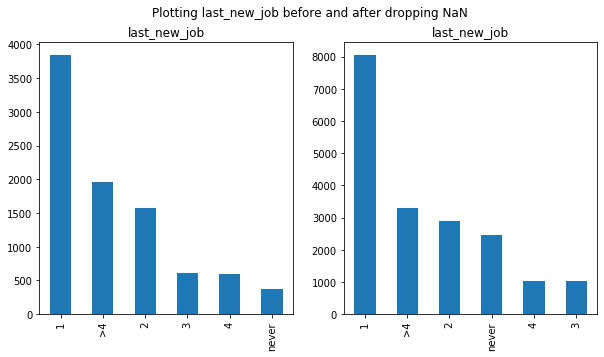

In [17]:
categorial_names = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                    'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

for column_name in categorial_names:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Plotting {column_name} before and after dropping NaN')
    X_hr_dropna[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax1, figsize=(10, 5))
    X_hr[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax2, figsize=(10, 5))
    plt.show()

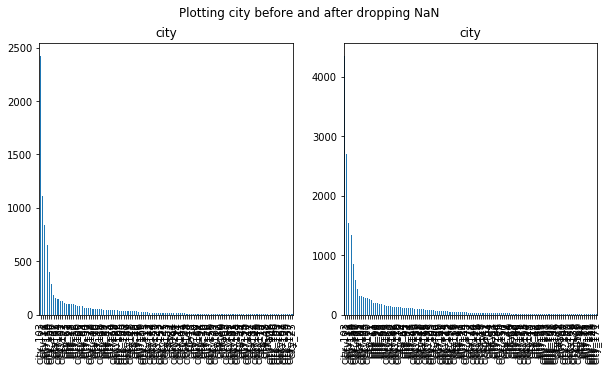

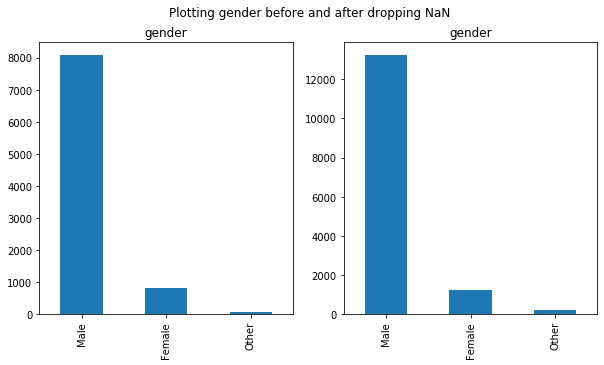

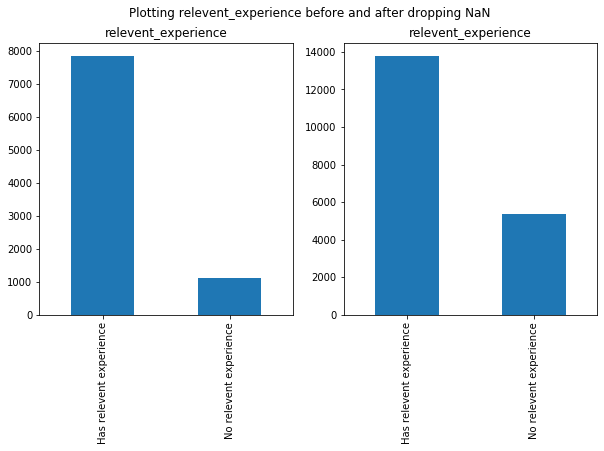

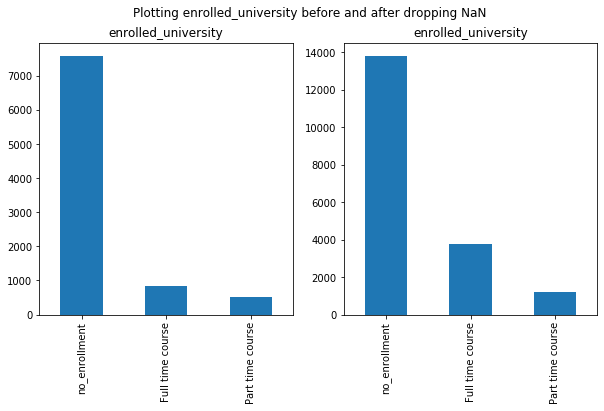

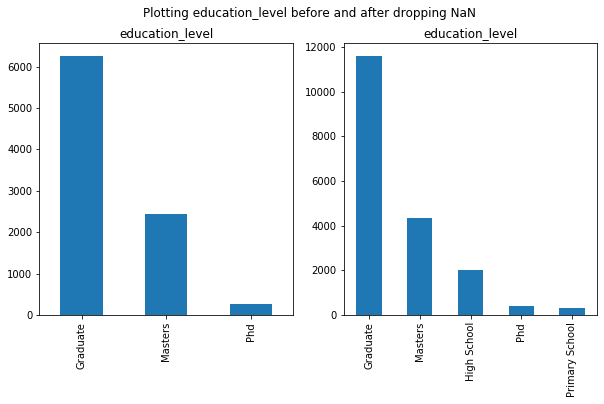

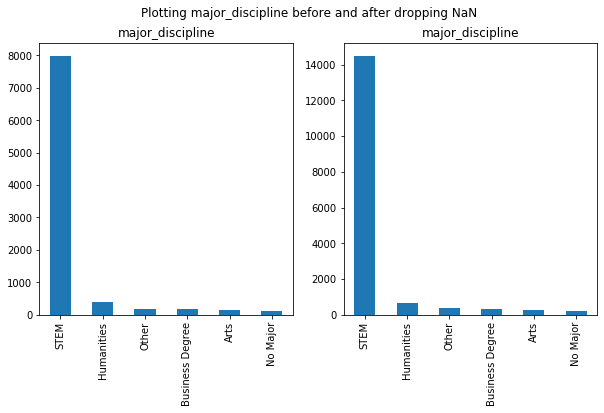

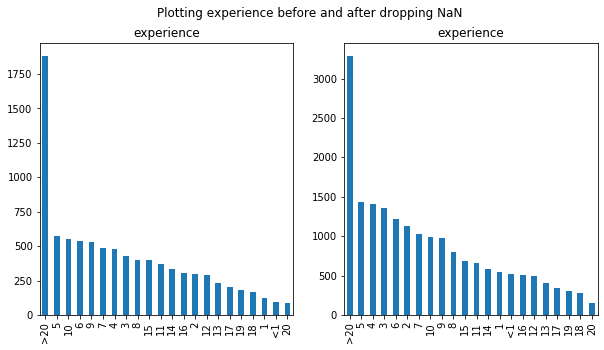

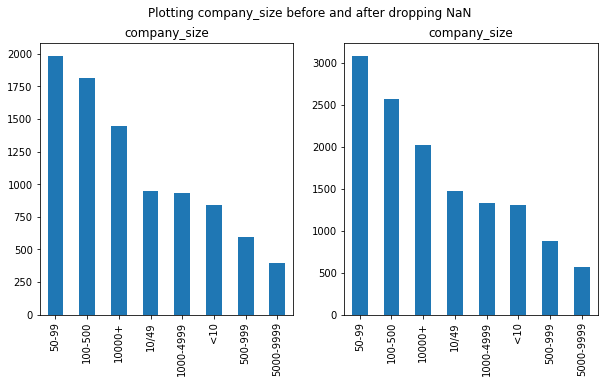

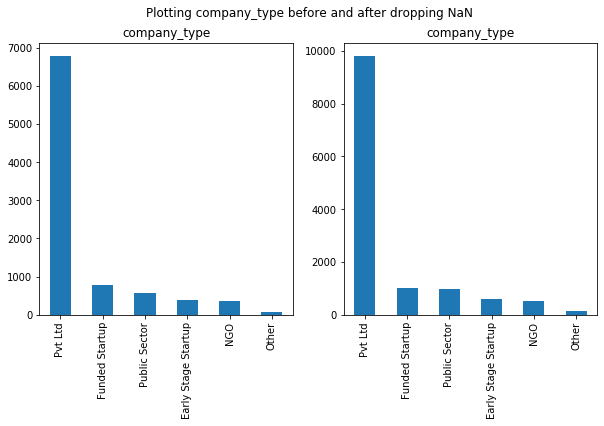

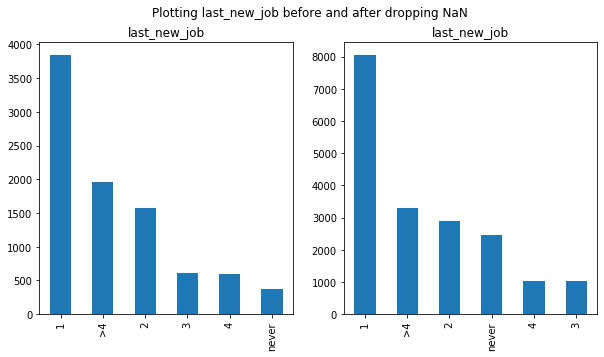

In [18]:
for column_name in categorial_names:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Plotting {column_name} before and after dropping NaN')
    X_hr_dropna[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax1, figsize=(10, 5))
    X_hr[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax2, figsize=(10, 5))
    plt.show()

### Summary
1. Some distributions have changed after dropping NaNs (enrolled university, education_level, experience).  
2. For the education level categories for High and Secondary school have disappeared. 
3. In addition to that the dataset size decreased twice.

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [19]:
X_hr.city_development_index.isna().sum()

0

In [20]:
X_hr.training_hours.isna().sum()

0

_There are no NaNs here:(_

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [21]:
for name in categorial_names:
    print(f'NaNs percent in {name}: {X_hr[name].isna().sum() / len(X_hr.index) * 100}%')

NaNs percent in city: 0.0%
NaNs percent in gender: 23.530639941538784%
NaNs percent in relevent_experience: 0.0%
NaNs percent in enrolled_university: 2.0148240943731075%
NaNs percent in education_level: 2.401085708320284%
NaNs percent in major_discipline: 14.68316108153252%
NaNs percent in experience: 0.33928385008873574%
NaNs percent in company_size: 30.994884643490973%
NaNs percent in company_type: 32.04927445453596%
NaNs percent in last_new_job: 2.207954901346696%


In [22]:
print('The most popular value for columns (with and without NaNs):\n\n')

for name in categorial_names:
    print(f'With NaNs {name}: {X_hr[name].value_counts().idxmax()} ({X_hr[name].value_counts().max() / len(X_hr.index) * 100}%)')
    print(f'Without NaNs {name}: {X_hr[name].dropna().value_counts().idxmax()} ({X_hr[name].dropna().value_counts().max() / X_hr[name].dropna().size * 100}%)')
    print()

The most popular value for columns (with and without NaNs):


With NaNs city: city_103 (22.732017955945295%)
Without NaNs city: city_103 (22.732017955945295%)

With NaNs gender: Male (69.01033510804886%)
Without NaNs gender: Male (90.24573378839591%)

With NaNs relevent_experience: Has relevent experience (71.99081323728991%)
Without NaNs relevent_experience: Has relevent experience (71.99081323728991%)

With NaNs enrolled_university: no_enrollment (72.12130702578557%)
Without NaNs enrolled_university: no_enrollment (73.60430428297464%)

With NaNs education_level: Graduate (60.53867835891011%)
Without NaNs education_level: Graduate (62.02802438763504%)

With NaNs major_discipline: STEM (75.64463931516859%)
Without NaNs major_discipline: STEM (88.66319975527685%)

With NaNs experience: >20 (17.15210355987055%)
Without NaNs experience: >20 (17.21049599329597%)

With NaNs company_size: 50-99 (16.09249399728573%)
Without NaNs company_size: 50-99 (23.32072617246596%)

With NaNs company_type

Let's fill the following columns:
* gender - filling with the most popular (male), because it is 90% of all not NaN values in this column
* major_discipline - filling with the most popular (STEM 75.64% / 88.66%) -- the same reason
* company_type - filling with the most popular (Pvt Ltd 51.24% / 75.41%) -- the same reason
* company_size - the percentage of the most popular column is quite small, so creating a new category Undefined
* enrolled_university - filling with the most popular (no_enrollment 72.12% / 73.60%) -- the same reason
* education_level - filling with the most popular (Graduate 60.54% / 62.03%) -- the same reason
* experience - the percentage of the most popular column is quite small, so creating a new category Undefined
* last_new_job - the percentage of the most popular column is quite small, so creating a new category Undefined

In [23]:
y_hr.describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

In [24]:
y_hr.isna().sum()

0

In [25]:
def fill_na(X, y):
    X_fill = X.copy()
    y_fill = y.copy()
    X_fill.gender = X.gender.fillna('Male')
    X_fill.major_discipline = X_fill.major_discipline.fillna('STEM')
    X_fill.company_type = X_fill.company_type.fillna('Pvt Ltd')
    X_fill.company_size = X_fill.company_size.fillna('Undefined')
    X_fill.enrolled_university = X_fill.enrolled_university.fillna('no_enrollment')
    X_fill.education_level = X_fill.education_level.fillna('Graduate')
    X_fill.experience = X_fill.experience.fillna('Undefined')
    X_fill.last_new_job = X_fill.last_new_job.fillna('Undefined')
    X_fill = X_fill.dropna()
    return X_fill, y_fill

In [26]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

In [27]:
print(f'Current dataset size is {len(X_hr_fill.index)}. It is {len(X_hr_fill.index) / len(X_hr.index) * 100}% from the X_hr dataset')

Current dataset size is 19158. It is 100.0% from the X_hr dataset


#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

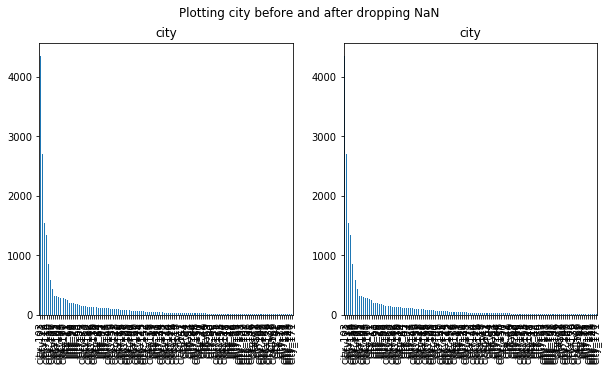

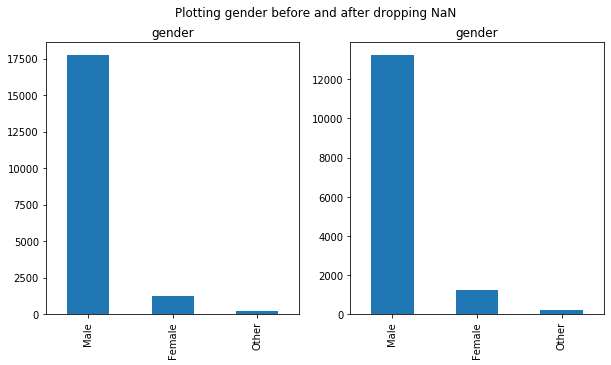

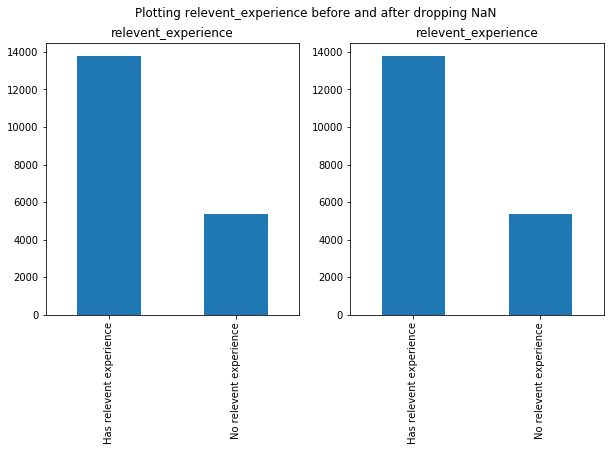

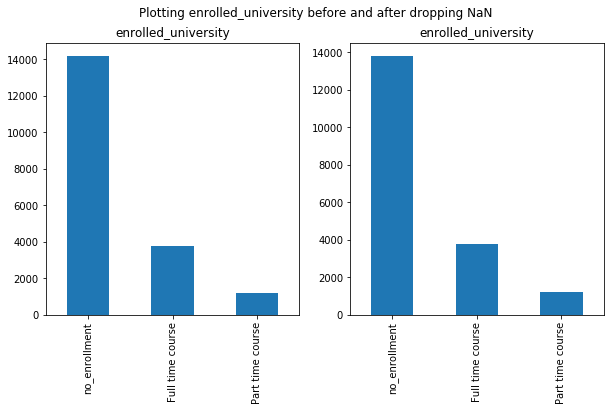

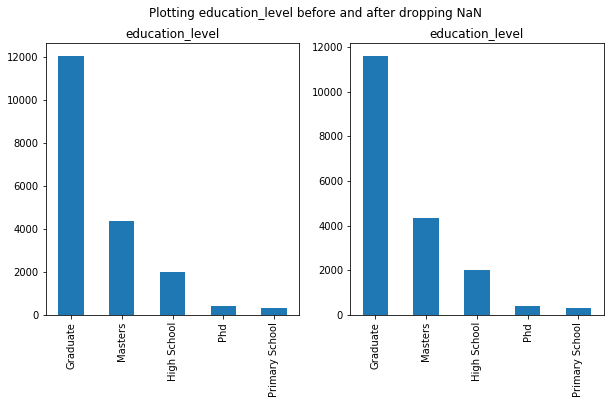

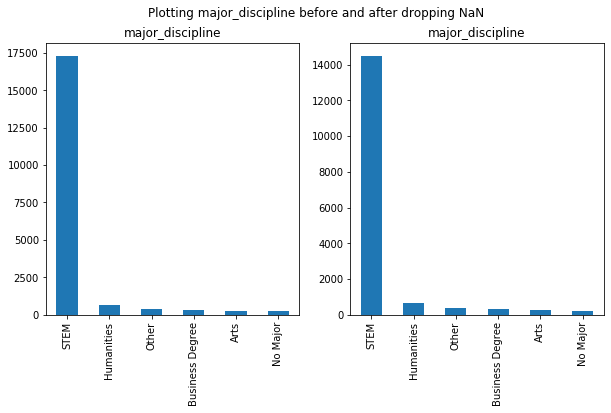

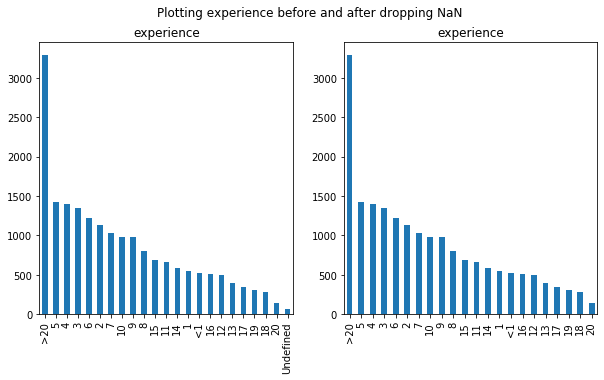

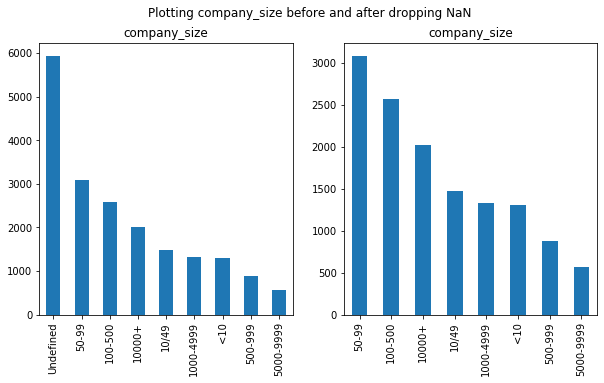

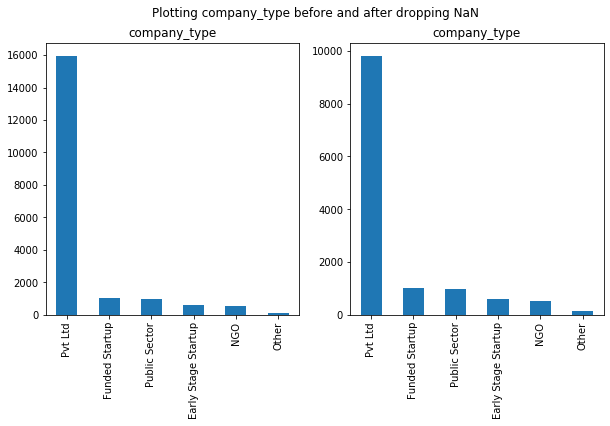

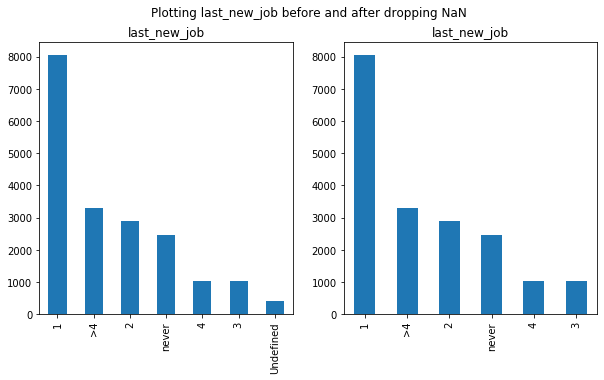

In [28]:
for column_name in categorial_names:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Plotting {column_name} before and after dropping NaN')
    X_hr_fill[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax1, figsize=(10, 5))
    X_hr[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax2, figsize=(10, 5))
    plt.show()

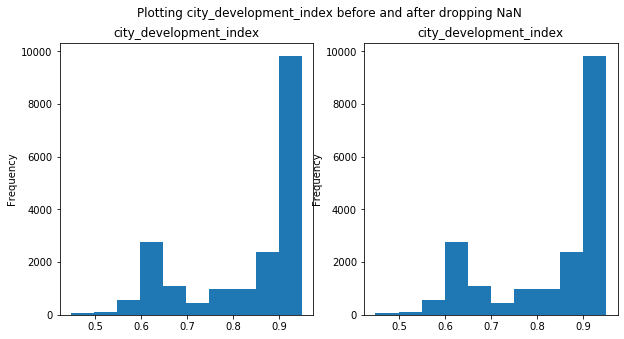

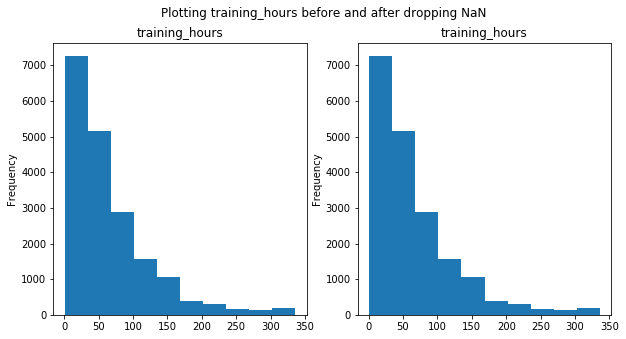

In [29]:
for column_name in ['city_development_index', 'training_hours']:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Plotting {column_name} before and after dropping NaN')
    X_hr_fill[column_name].plot(kind='hist', title=column_name, ax=ax1, figsize=(10, 5))
    X_hr[column_name].plot(kind='hist', title=column_name, ax=ax2, figsize=(10, 5))
    plt.show()

Almost all the distributions are still the same. The only column with major changes is the company_size feature distribution. The most popular class there is now the undefined class. But I think it's better than changing the NaN to one of the existing categories. 

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации - Bahrain
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [30]:
X_covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [31]:
X_covid.groupby('country').count()

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Algeria,2,2,2,0,0,1,1,2,0,0,1,2,2,2
Andorra,8,8,2,2,0,0,7,2,2,0,7,8,8,8
Argentina,40,40,21,15,15,11,39,21,15,15,39,40,40,40
Austria,28,28,28,28,20,27,27,28,28,20,27,28,28,28
Bahrain,46,46,41,41,0,39,45,41,41,0,45,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,25,25,25,0,0,24,24,25,0,0,24,25,25,25
United Arab Emirates,33,33,30,26,26,26,32,30,26,26,32,33,33,33
United Kingdom,55,55,31,31,28,26,54,31,31,28,54,55,55,55


In [32]:
X_covid.groupby('country').count().query('date == 46')

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Bahrain,46,46,41,41,0,39,45,41,41,0,45,46,46,46


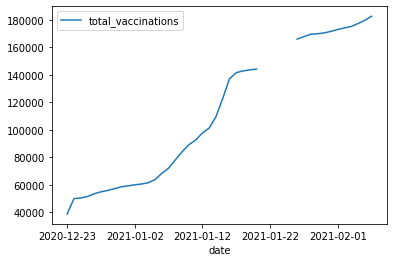

In [33]:
X_covid[X_covid.country == 'Bahrain'].plot(x='date', y='total_vaccinations')

_Let's use the cubic spline interpolation to fill the NaN values. It's a good idea here because the value should definelety grow. It's better not to use the line to fill the data here, because it's obvious that the function is not linear. The cubic spline is the most popular way to fill the not linear functions._

In [34]:
X_covid_filled = X_covid.copy()
X_covid_filled.total_vaccinations.interpolate(method='spline', order=3, inplace=True)

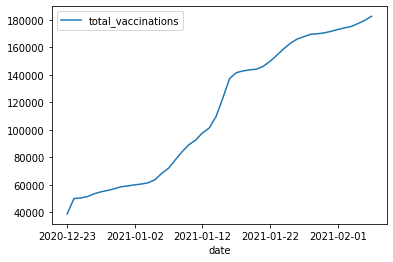

In [35]:
X_covid_filled[X_covid_filled.country == 'Bahrain'].plot(x='date', y='total_vaccinations')

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


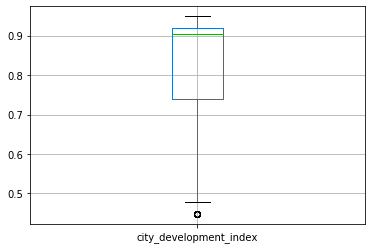

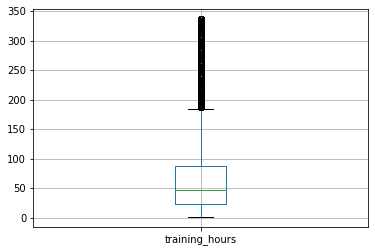

In [36]:
for column_name in ['city_development_index', 'training_hours']:
    X_hr_fill.boxplot(column=[column_name])
    plt.show()

_I think thare are no outliers in the dataset. Obviously the only two elements outside the wiskers in city_development_index feature are simply badly developed cities and the values uotside the whiskers in training_hours doesn't conflict with the meaning of the feature._

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


The features 'enrolled_university', 'education_level', 'experience', 'company_size', 'last_new_job' require ranging, so I use the label encoding.
The city feature has to many unique values, so I use the frequency encoding.
All the other features are fine for one-hot encoding.

In [37]:
def encode(X):
    onehot_encoding_names = ['gender', 'relevent_experience', 'major_discipline', 'company_type']
    X_encode = pd.get_dummies(X, prefix=onehot_encoding_names, columns=onehot_encoding_names)
    
    label_encoding_names = ['enrolled_university', 'education_level', 'experience', 'company_size', 'last_new_job']
    for name in label_encoding_names:
        X_encode.loc[:, name + '_label'] = pd.factorize(X[name], sort=True)[0].reshape(-1, 1)
    X_encode.drop(columns=label_encoding_names, inplace=True)
        
    frequency_encoding_names = ['city']
    for name in frequency_encoding_names:
        enc = (X_encode.groupby(name).size()) / len(X_encode)
        X_encode[name] = X_encode[name].apply(lambda x : enc[x])
    
    return X_encode

In [38]:
X_hr_encode = encode(X_hr_fill)

In [39]:
X_hr_encode.head()

,enrollee_id,city,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,major_discipline_Arts,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_label,education_level_label,experience_label,company_size_label,last_new_job_label
0,8949,0.227320,0.920,36,0,1,0,1,0,0,...,0,0,0,0,1,2,0,21,8,0
1,29725,0.003549,0.776,47,0,1,0,0,1,0,...,0,0,0,0,1,2,0,6,4,4
2,11561,0.141038,0.624,83,0,1,0,0,1,0,...,0,0,0,0,1,0,0,15,8,6
3,33241,0.002819,0.789,52,0,1,0,0,1,0,...,0,0,0,0,1,2,0,20,8,6
4,666,0.006681,0.767,8,0,1,0,1,0,0,...,1,0,0,0,0,2,2,21,4,3


### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [40]:
def undersampling(X, y):
    X_under = X.copy()
    X_under['y'] = y
    zero_count = X_under[X_under.y == 0].shape[0]
    ones_count = X_under[X_under.y == 1].shape[0]
    if zero_count < ones_count:
        X_ones = X_under[X_under.y == 1].iloc[:zero_count, :]
        X_under = pd.concat([X_ones, X_under[X.y == 0]])
    else:
        X_zeros = X_under[X_under.y == 0].iloc[:ones_count, :]
        X_under = pd.concat([X_zeros, X_under[X_under.y == 1]])
    X_under = X_under.sample(frac=1).reset_index(drop=True)
    y_under = X_under['y']
    X_under.drop(columns=['y'])
    return X_under, y_under

def oversampling(X, y):
    X_over = X.copy()
    X_over['y'] = y
    zero_count = X_over[X_over.y == 0].shape[0]
    ones_count = X_over[X_over.y == 1].shape[0]
    if zero_count < ones_count:
        X_zeros = X_over[X_over.y == 0].sample(ones_count, replace=True)
        X_over = pd.concat([X_zeros, X_over[X_over.y == 1]])
    else:
        X_ones = X_over[X_over.y == 1].sample(zero_count, replace=True)
        X_over = pd.concat([X_ones, X_over[X_over.y == 0]])
    X_over = X_over.sample(frac=1).reset_index(drop=True)
    y_over = X_over.y
    X_over.drop(columns=['y'])
    return X_over, y_over

In [41]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

In [42]:
y_hr_under.value_counts()

0.0    4777
1.0    4777
Name: y, dtype: int64

In [43]:
y_hr_over.value_counts()

0.0    14381
1.0    14381
Name: y, dtype: int64

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

X_hr_SMOTE.shape[0] == y_hr_SMOTE.shape[0]

True

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

The balancing methods didn't strongly affect the data distribution. The only difference is that the SMOTE algo didn't generate any big values for the city and city_development_index columns.

In [45]:
X_hr_encode

,enrollee_id,city,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,major_discipline_Arts,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_label,education_level_label,experience_label,company_size_label,last_new_job_label
0,8949,0.227320,0.920,36,0,1,0,1,0,0,...,0,0,0,0,1,2,0,21,8,0
1,29725,0.003549,0.776,47,0,1,0,0,1,0,...,0,0,0,0,1,2,0,6,4,4
2,11561,0.141038,0.624,83,0,1,0,0,1,0,...,0,0,0,0,1,0,0,15,8,6
3,33241,0.002819,0.789,52,0,1,0,0,1,0,...,0,0,0,0,1,2,0,20,8,6
4,666,0.006681,0.767,8,0,1,0,1,0,0,...,1,0,0,0,0,2,2,21,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.007882,0.878,42,0,1,0,0,1,0,...,0,0,0,0,1,2,0,5,8,0
19154,31398,0.227320,0.920,52,0,1,0,1,0,0,...,0,0,0,0,1,2,0,5,8,3
19155,24576,0.227320,0.920,44,0,1,0,1,0,0,...,0,0,0,0,1,2,0,21,4,3
19156,5756,0.009135,0.802,97,0,1,0,1,0,0,...,0,0,0,0,1,2,1,20,5,1


Plotting experience_label without balancing / undersampling / oversampling / SMOTE


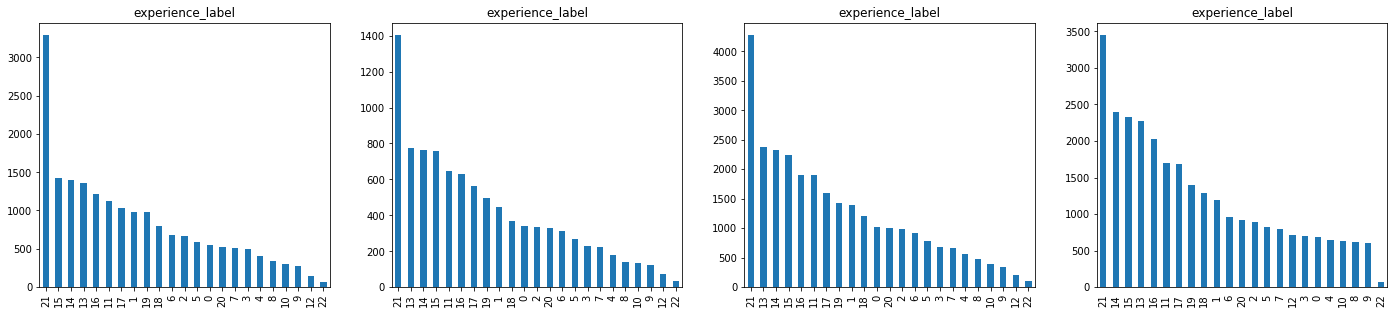

Plotting company_size_label without balancing / undersampling / oversampling / SMOTE


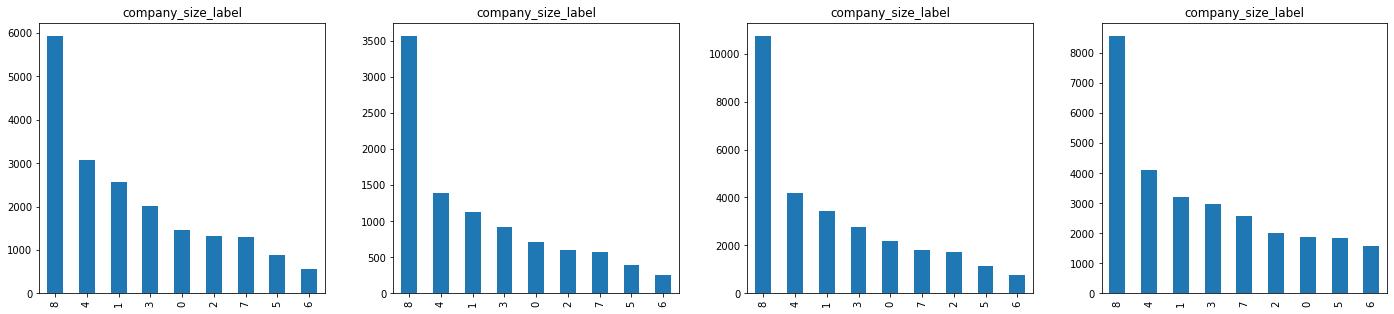

Plotting last_new_job_label without balancing / undersampling / oversampling / SMOTE


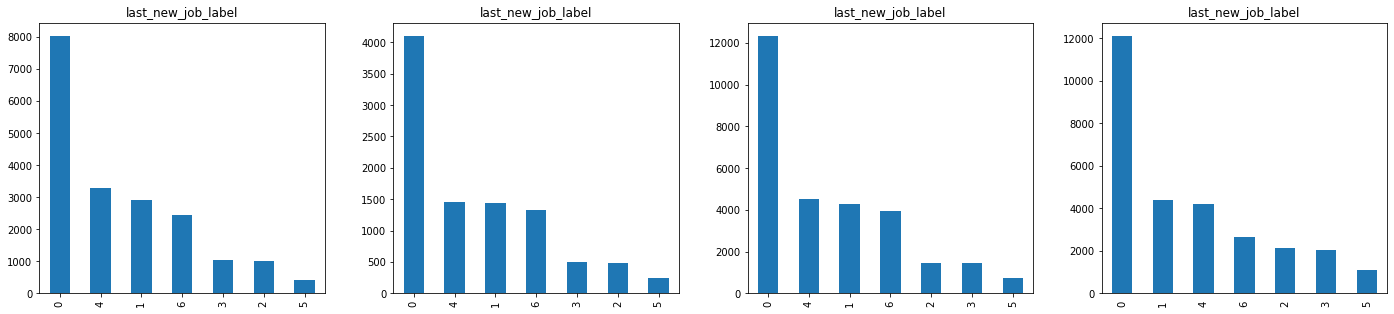

Plotting education_level_label without balancing / undersampling / oversampling / SMOTE


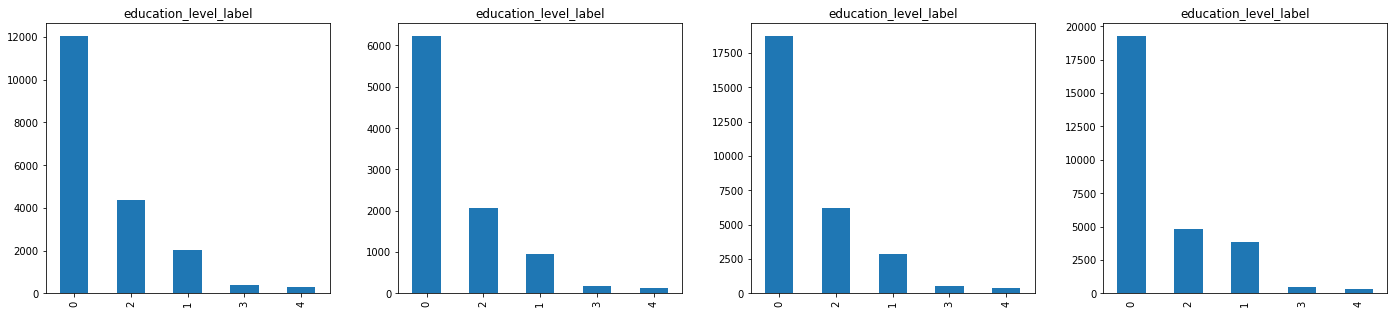

In [46]:
names = ['experience', 'company_size', 'last_new_job', 'education_level']


for column_name in names:
    column_name += '_label'
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
    print(f'Plotting {column_name} without balancing / undersampling / oversampling / SMOTE')
    plt.tick_params(bottom=False)
    X_hr_encode[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax1)
    X_hr_under[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax2)
    X_hr_over[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax3)
    X_hr_SMOTE[column_name].value_counts().plot(kind='bar', title=column_name, ax=ax4)
    fig.tight_layout(pad=3.0)
    plt.show()

Plotting city without balancing / undersampling / oversampling / SMOTE


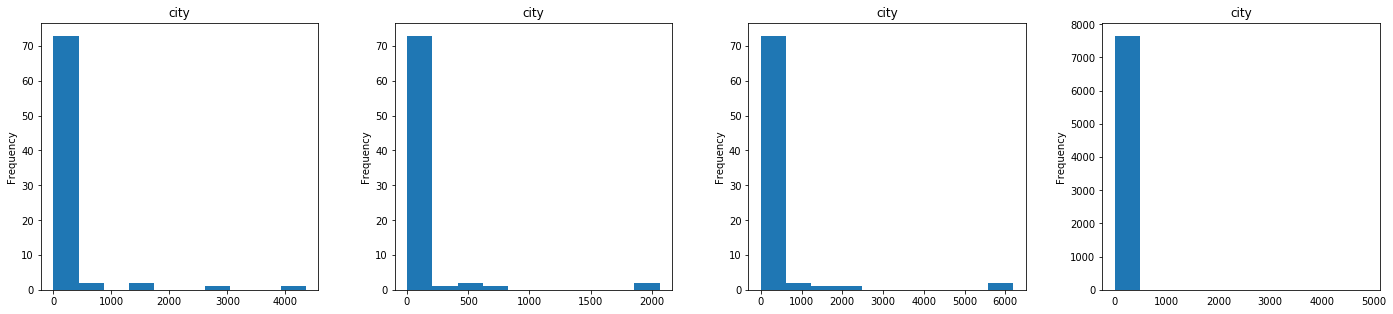

Plotting city_development_index without balancing / undersampling / oversampling / SMOTE


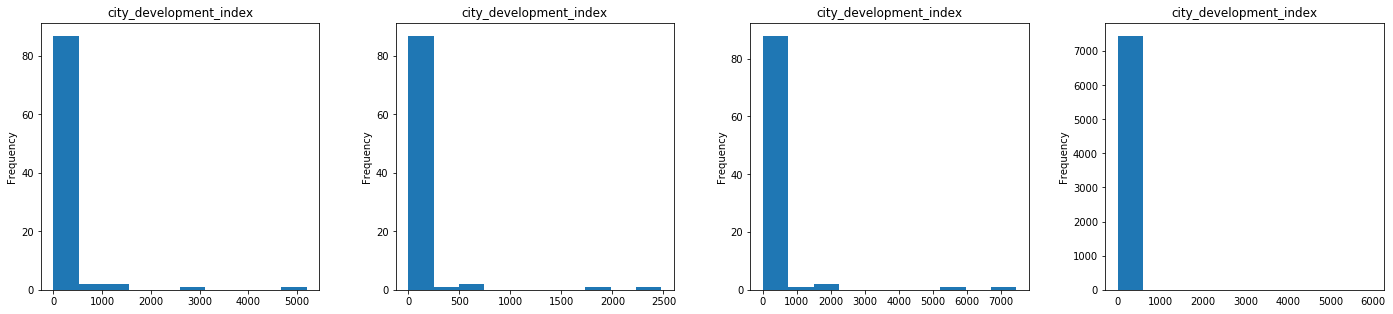

Plotting training_hours without balancing / undersampling / oversampling / SMOTE


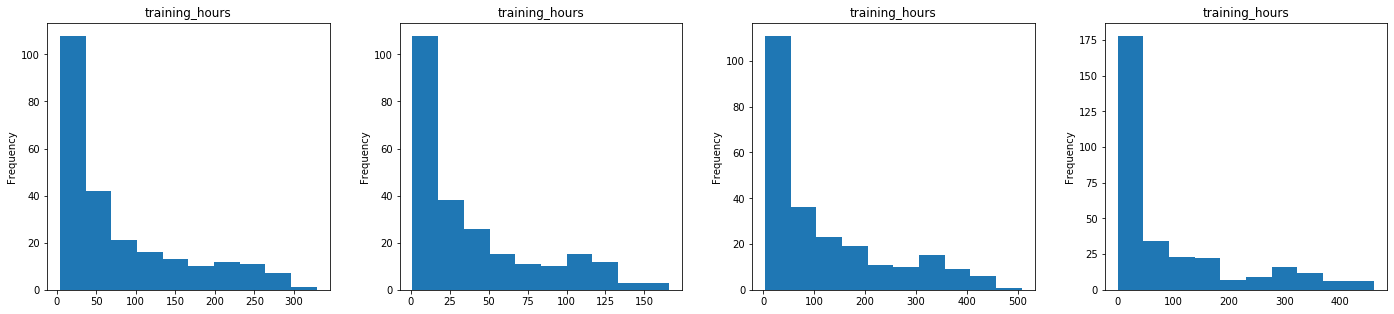

In [47]:
names = ['city','city_development_index', 'training_hours']

for column_name in names:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
    print(f'Plotting {column_name} without balancing / undersampling / oversampling / SMOTE')
    plt.tick_params(bottom=False)
    X_hr_encode[column_name].value_counts().plot(kind='hist', title=column_name, ax=ax1)
    X_hr_under[column_name].value_counts().plot(kind='hist', title=column_name, ax=ax2)
    X_hr_over[column_name].value_counts().plot(kind='hist', title=column_name, ax=ax3)
    X_hr_SMOTE[column_name].value_counts().plot(kind='hist', title=column_name, ax=ax4)
    fig.tight_layout(pad=3.0)
    plt.show()

Plotting gender without balancing / undersampling / oversampling / SMOTE


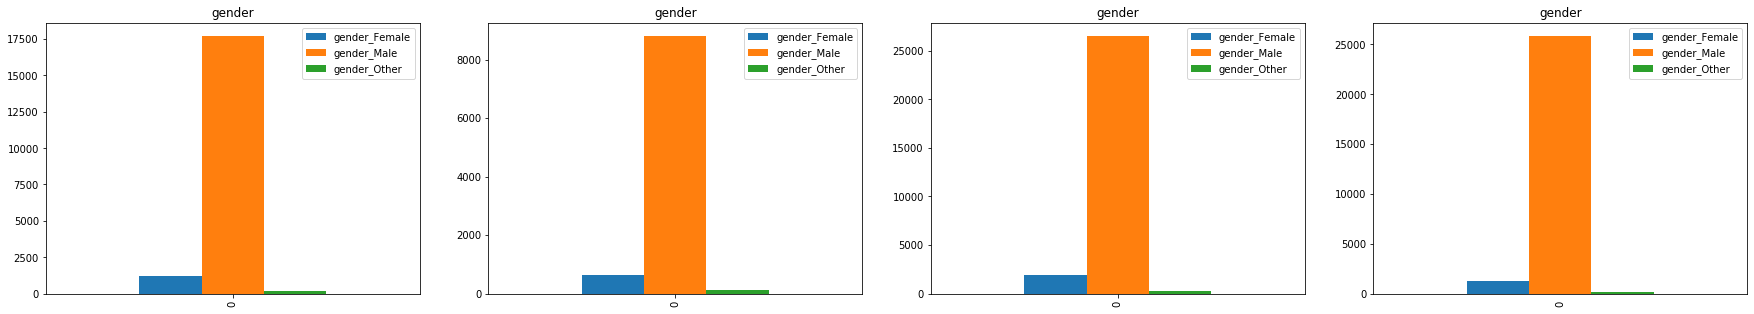

Plotting relevent_experience without balancing / undersampling / oversampling / SMOTE


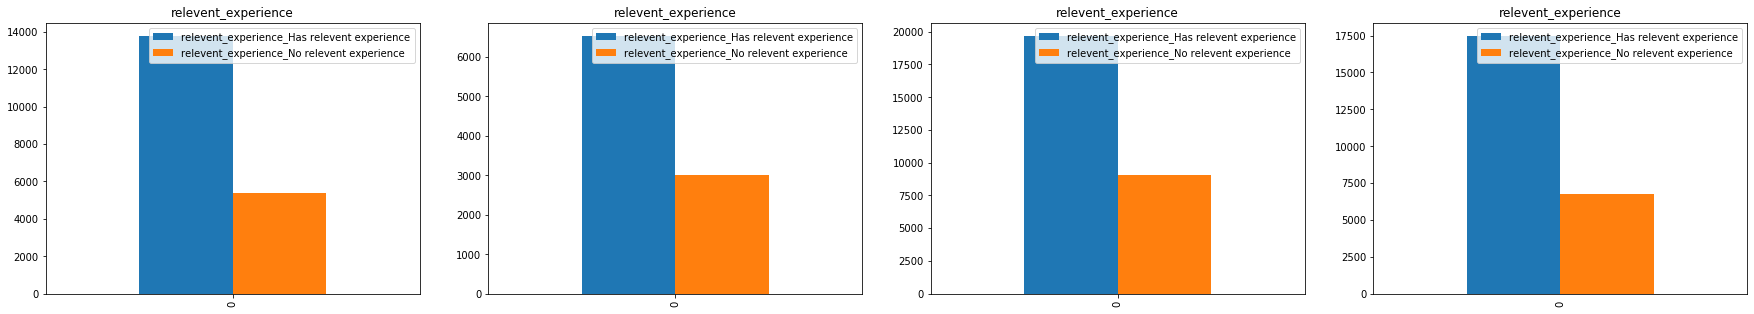

Plotting major_discipline without balancing / undersampling / oversampling / SMOTE


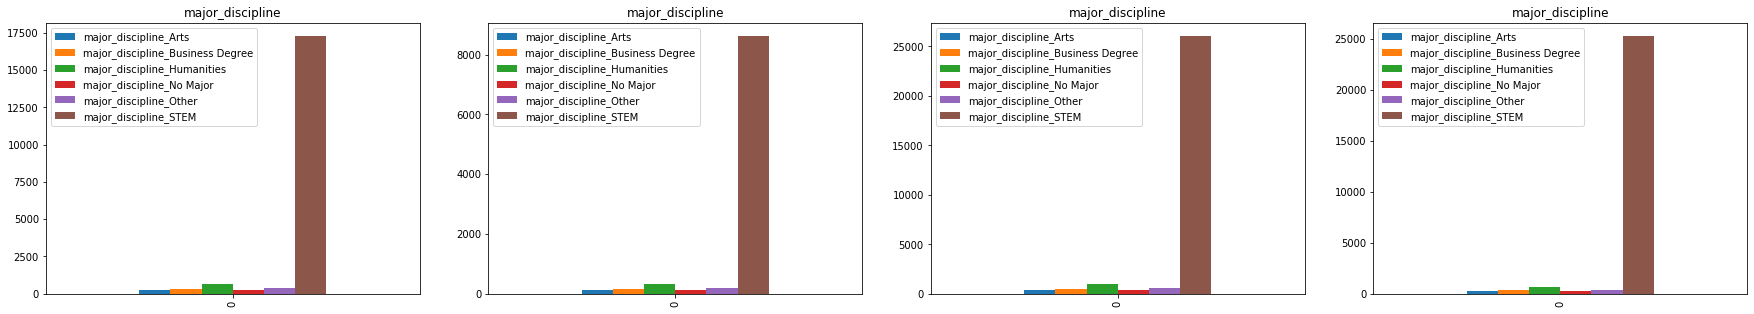

Plotting company_type without balancing / undersampling / oversampling / SMOTE


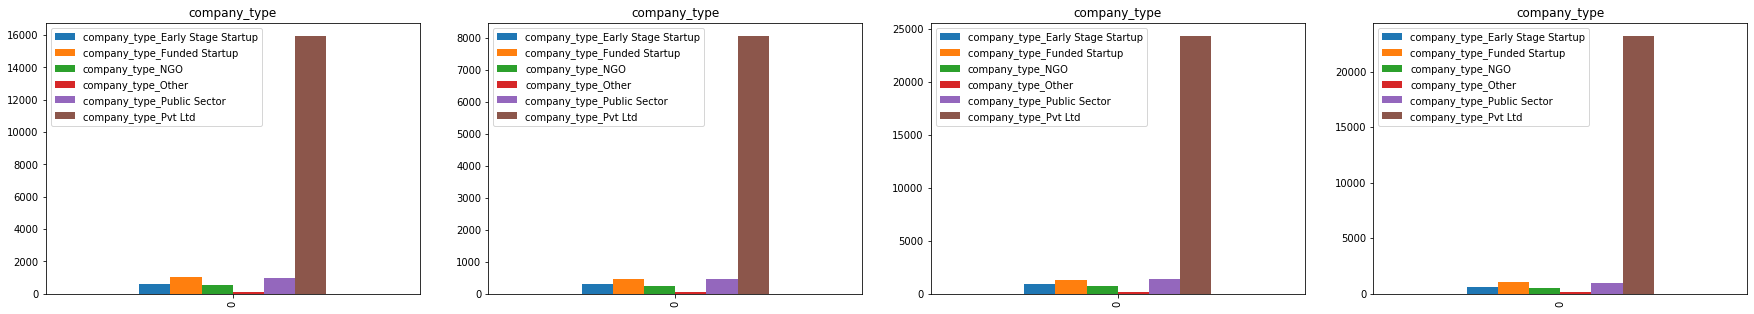

In [48]:
names = ['gender', 'relevent_experience', 'major_discipline', 'company_type']

def get_series(cols, data):
    return pd.DataFrame({col: [len(data[data[col] == 1])] for col in cols})

for column_name in names:
    cols = [col for col in X_hr_encode.columns if col.startswith(column_name)]
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,5))
    print(f'Plotting {column_name} without balancing / undersampling / oversampling / SMOTE')
    plt.tick_params(bottom=False)
    get_series(cols, X_hr_encode).plot(kind='bar', title=column_name, ax=ax1)
    get_series(cols, X_hr_under).plot(kind='bar', title=column_name, ax=ax2)
    get_series(cols, X_hr_over).plot(kind='bar', title=column_name, ax=ax3)
    get_series(cols, X_hr_SMOTE).plot(kind='bar', title=column_name, ax=ax4)
    fig.tight_layout(pad=3.0)
    plt.show()